In [74]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#load data
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')
print(iris.shape)

#first 5 rows
iris.head()

(150, 6)


,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [75]:
#id is not useful, dropping the row
iris.drop('id', axis=1, inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [76]:
#check summary stats
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
#check distribution of data by species
print(iris.groupby('species').size())
iris['species'].value_counts()


species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64


species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
Name: count, dtype: int64

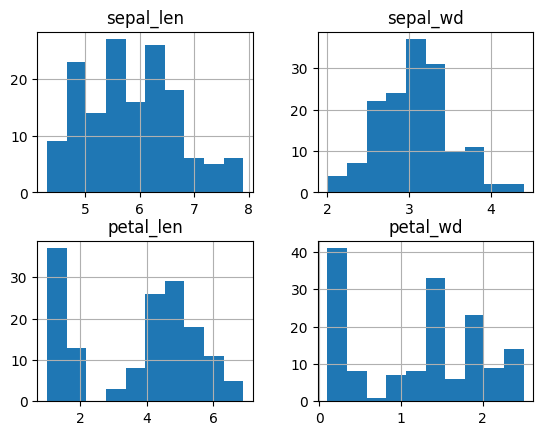

In [78]:
#plot univariate plot
iris.hist()
plt.show()

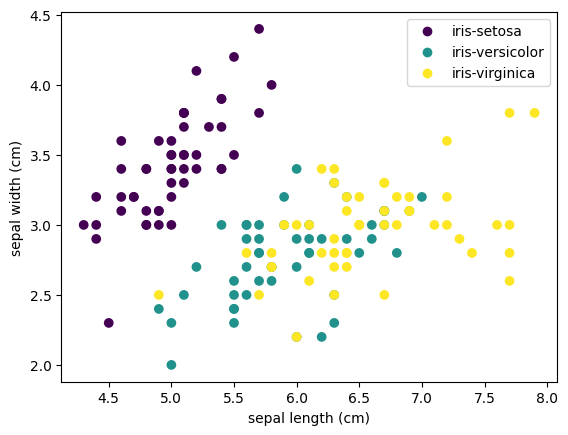

In [79]:
#to see interaction between different classes
inv_name_dict = {'iris-setosa': 0,
                 'iris-versicolor': 1,
                 'iris-virginica': 2}

#integer code
colors = [inv_name_dict[item] for item in iris['species']]

#plot scatter plot
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

#legend
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

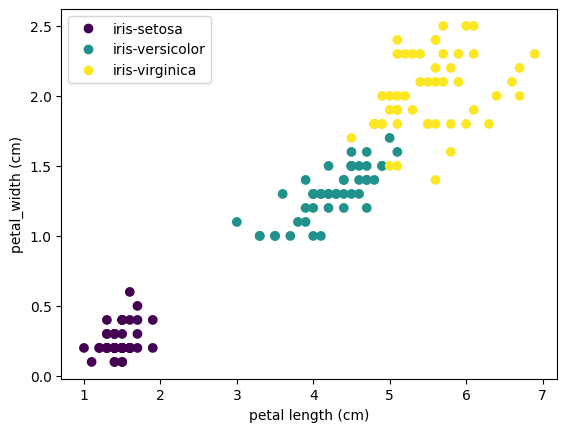

In [80]:
#by petal length and petal width
inv_name_dict = {'iris-setosa': 0,
                 'iris-versicolor': 1,
                 'iris-virginica': 2}

colors = [inv_name_dict[item] for item in iris['species']]

scatter = plt.scatter(iris['petal_len'], iris['petal_wd'], c=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal_width (cm)')

plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

In [81]:
#petal len and petal wd shows best correlation
X = iris[['petal_len', 'petal_wd']]
y = iris['species']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)#sratify y to ensure train and test have same and equal different species distribution

print(y_train.value_counts())
print(y_test.value_counts())

species
iris-setosa        35
iris-virginica     35
iris-versicolor    35
Name: count, dtype: int64
species
iris-virginica     15
iris-setosa        15
iris-versicolor    15
Name: count, dtype: int64


In [82]:
#model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [83]:
#prediction
pred = knn.predict(X_test)
pred

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-virginica', 'iris-setosa', 'iris-versicolor', 'iris-setosa',
       'iris-versicolor', 'iris-virginica', 'iris-versicolor',
       'iris-versicolor', 'iris-virginica', 'iris-virginica',
       'iris-setosa', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-setosa', 'iris-virginica', 'iris-setosa',
       'iris-setosa', 'iris-versicolor', 'iris-versicolor',
       'iris-virginica', 'iris-virginica', 'iris-setosa', 'iris-setosa',
       'iris-setosa', 'iris-versicolor', 'iris-virginica',
       'iris-virginica', 'iris-versicolor', 'iris-setosa', 'iris-setosa'],
      dtype=object)

In [84]:
#predict probability for each class
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [85]:
#let model predict new data
new_data = np.array([[3.76, 1.20], [5.25, 1.2], [1.58, 1.2]])

In [86]:
#use best param
from sklearn.model_selection import GridSearchCV

knn_search = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 10)}
knn_gscv = GridSearchCV(knn_search, param_grid, cv=5)
knn_gscv.fit(X, y)
knn_best = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_best.fit(X, y)


,n_neighbors,np.int64(4)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [87]:
#make it 2d array
print(knn_best.predict(new_data))
knn_best.predict_proba(new_data) #class score

['iris-versicolor' 'iris-virginica' 'iris-setosa']


c:\Users\TYC\Desktop\python code\sklearn\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\TYC\Desktop\python code\sklearn\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])